# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [17]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### Training the convnet on MNIST images

In [20]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [22]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4356 - accuracy: 0.8609 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0477 - val_accuracy: 0.9864
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0425 - val_accuracy: 0.9890
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0378 - val_accuracy: 0.9891
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0365 - val_accuracy: 0.9898


#### evaluate model

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0293 - accuracy: 0.9905


0.9904999732971191

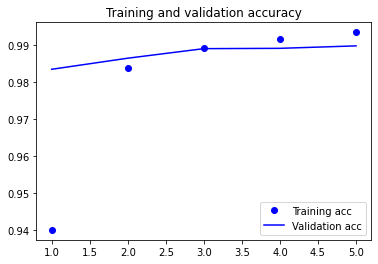

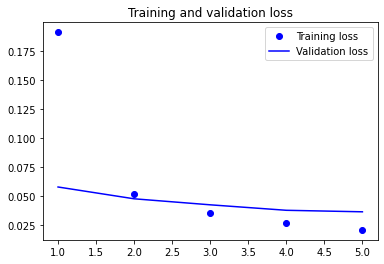

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [ ]:
# Write code here

def create_model(optimizer='Adam', activation='relu'):
  model = models.Sequential()

  # ConvNet
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))

  # Classifier
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizer, 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

The grid search below tries 36 different combinations of batch sizes, optimizers, and activations functions over 5 epochs each which makes the total 180 fits.

The hyper-parameter tuning process finds that the best accuracy is 98.94% using the relu activation function and RMSprop optimizer with a batch size of 32.

In [34]:
batch_size = [32, 64, 128]

optimizer = ['RMSprop', 'Adagrad', 'Adam']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

activation = ['relu', 'softmax', 'tanh', 'elu']
# activation_function = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'elu', 'exponential']

dropout_rate = [0, 0.25, 0.5]

param_grid = dict(batch_size=batch_size, optimizer=optimizer, activation=activation)

model = KerasClassifier(build_fn=create_model, epochs=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1)
grid_result = grid.fit(train_images, train_labels)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Epoch 1/5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1500/1500 [==============================] - 6s 3ms/step - loss: 0.3630 - accuracy: 0.8817
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9851
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9894
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9898
Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8830
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9834
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0247 - accuracy: 0.9925
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9897
Epoc

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 52.6min finished


1875/1875 [==============================] - 7s 3ms/step - loss: 0.3144 - accuracy: 0.9014
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9944
Best: 0.989400 using {'activation': 'relu', 'batch_size': 32, 'optimizer': 'RMSprop'}
